<a href="https://colab.research.google.com/github/hxk271/DataSciSocs/blob/main/W04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 04 (<code>matplotlib</code>를 이용한 시각화)

> 오늘은 **데이터 시각화(data visualization)**에 꼭 필요한 패키지를 사용하는 법을 학습하기로 한다. 기본적인 스킬을 학습한 다음에는, (지난 주에도 사용했던) 기온 공공데이터를 다시 한 번 사용하여 실제 자료를 토대로 시각화를 구현해보자.

## 1. Google Colab 기초

> 앞으로도 Google Colab을 계속 이용하게 되므로 알아두면 조금 더 편리한 상식을 익혀보자!
<br><br>
> 1. Google Colab은 구글 서버에 사용자 계정별로 Google Drive에 약간의 공간을 할당해준다. 그러므로 초보자 입장에서는 코드나 자료 파일을 업로드해두면 편리하다. 물론 여러분이 작업한 코드(ipynb 파일)도 모두 여기에서 찾을 수 있다!
<br><br>
> 2. Google Colab에서 위로 칸을 추가할 때는 [A] 키를(Ctrl-M-A), 아래로 추가할 때는 [B] 키를 누른다(Ctrl-M-B). 이미 생성된 칸을 지울 때는 Ctrl-M-D 키를 눌러 삭제한다.
<br><br>
> 3. 우리는 **마크다운(markdown)**이라는 일종의 표준양식을 사용해 참조문서를 만들 수 있다(*지금 보고 있는 이 칸이다!*). Ctrl-M-M을 누르거나 메뉴에서 고르면 된다. 마크다운에서 사용되는 고유한 문법이 있다.
<br><br>
> 4. 뭐가 뭔지 잘 모를때는 검색하거나 생성형AI에 물어본다.

## 2. 리스트 안의 리스트

> 리스트는 다양한 방식으로 활용될 수 있다. 가령 리스트는 또다른 리스트를 자신의 원소로 삼을 수 있다! 이렇게 리스트 안의 리스트를 쓰려면 특정 리스트나 그 안의 원소를 꺼내쓰기 위해 어떤 인덱스를 써야할지 잘 예상해야 한다(실무적으로는 시행착오를 겪으면 되니 너무 걱정할 필요가 없다).

In [ ]:
#두 개의 리스트
list1 = [1, 2, 3]
list2 = ['a', 'b', 'c', 1]     #리스트 안에 문자열과 숫자가 뒤섞여도 된다.

In [ ]:
#두 개의 리스트가 들어갈 빈집(placeholder)
lists = []

#추가하기 1
lists.append(list1)
lists.append(list2)

print(lists)

In [ ]:
#추가하기 2
lists = [list1, list2]

print(lists)

In [ ]:
#인덱싱
print(lists[0])
print(lists[1])
print(lists[1][0])
print(lists[0][2])

In [ ]:
#빈집 안의 빈집(placeholders within placeholder)
lists = [[], []]

#빈집 안의 빈집 지정하여 원소 추가하기
lists[0].append(1)
lists[0].append(2)
lists[0].append(3)
lists[1].append('a')
lists[1].append('b')
lists[1].append('d')
lists[1].append(1)

print(lists)

In [ ]:
#수정하기
lists[1][1] = 'c'
print(lists)

> **연습문제 1.** <code>[1, 2, 3, 'a', 'b', 'c']</code>와 <code>[[1, 2, 3], ['a', 'b', 'c']]</code>를 각각 리스트 형식으로 입력하시오. 두 리스트에서 <code>'a'</code>라는 원소를 호출하고자 한다. 각각 어떤 **인덱스(index)**를 선택해야 할지 예상하고 코드를 작성하시오.

In [ ]:
a = [1, 2, 3, 'a', 'b', 'c']
b = [[1, 2, 3],
     ['a', 'b', 'c']]

print(a[3])
print(b[1][0])

> **연습문제 2.** 1에서 10까지의 자연수가 주어져 있다고 하자. <code>numbers</code>라는 리스트를 만든 다음, 그 안에 다시 두 개의 리스트를 만들되, 다음과 같이 홀수를 첫번째 리스트에, 짝수를 두번째 리스트에 삽입하시오.
<br><br>
><center><code>[[1, 3, 5, 7, 9], [2, 4, 6, 8]]</code></center>
<br>
>
> ___
> 힌트: 2로 나누어 떨어지는 숫자는 짝수가 된다. 가령 <code>4 % 2 == 0</code>

In [ ]:
numbers = [[], []]        #빈집(placeholder)

for i in range(1, 10):
    if i % 2 == 0:       #짝수
        numbers[1].append(i)
    else:
        numbers[0].append(i)

print(numbers)

## 3. 문자열 분리하기

> 문자열(string)이 주어졌을 때 <code>split()</code> 함수를 사용하면 이를 기준으로 둘로 나눌 수 있다!
<br><br>
> 가령 <code>"My.World".split('.')</code>을 입력하면 <code>["My", World"]</code>로 텍스트가 분리되어 리스트 안의 두 <i>원소(elements)</i>로 들어간다. 이 기술은 특히 영어에서 **파싱(parsing)**의 기초가 된다(Why?).

> **연습문제 3.** 다음 가사 문자열을 (띄어쓰기를 기준으로) 파싱하여 리스트에 각 단어를 집어넣으시오.
<br>
<center>"Hey Jude, don't make it bad. Take a sad song and make it better."</center>

In [ ]:
lyrics = "Hey Jude, don't make it bad. Take a sad song and make it better."
heyjude = lyrics.split(" ")
heyjude

## 4. <code>matplotlib</code> 시작하기

> <code>matplotlib</code> 라이브러리를 사용해 다양한 데이터 시각화를 수행할 수 있다. <code>visualization</code>을 구글링하여 쇼케이스를 참고하자!
<br><br>
전문가/학자들을 상대할 때는 시각화가 상대적으로 덜 중요하지만, 일반인을 상대할 때는 시각화가 생각보다 중요하다. 오늘날 좋은 글 못지 않게 좋은 시각화가 중요한 소양이 되었다(이것만을 전문적으로 공부하는 분야도 따로 있다).
<br><br>
오늘 우리는 (1) **선 그래프(line chart)**, (2) **히스토그램(histogram)**/**막대 차트(bar chart)**, 그리고 (3) **상자-수염 그림(box-whiskers' plot)**을 익혀보기로 하자.
<br>
<br>
우리는 <code>matplotlib.pyplot</code>을 주로 사용하게 되는데 모를 때는 <code>help()</code>로 용례를 확인할 수 있다(물론 검색이 더 쉽다).

In [ ]:
import matplotlib.pyplot as plt          #matplotlib.pyplot은 너무 기니까 plt로!
help(plt.plot)

In [ ]:
plt.plot([10, 20, 30, 40])                  #Y
plt.show()

In [ ]:
plt.plot([ 1,  2,  3,  4],                   #X
         [12, 43, 25, 15])                   #Y
plt.show()

> 이제 그림을 그릴 수 있었으니 타이틀(title)을 달아보자.

In [ ]:
plt.title('최근 수익 추이')
plt.plot([ 1,  2,  3,  4],                   #X
         [12, 43, 25, 15])                   #Y
plt.show()

> 에러가 나타난다! 잘 보면 핵심은 <b>자형(glyph)</b>이 빠져있다는 것이다! 어떻게 해결하면 좋을까? 이런 것들은 경험이 해결해 준다(혹은 검색이 해결해준다).
<br><br>
> 검색해보면 한글 폰트를 설정해주어 간단히 해결할 수 있음을 알 수 있다. 아래 코드는 Linux 명령어인데 의미는 잘 몰라도 된다(이유 따윈 몰라도 작동하면 된거다).

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

> 그리고 Google Colab 메뉴에서 [런타임]-[세션 다시 시작]을 눌러 런타임을 재시작한다.

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

plt.title('최근 수익 추이')
plt.plot([ 1,  2,  3,  4],                   #X
         [12, 43, 25, 15])                   #Y
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

plt.title('최근 수익 추이')
plt.plot([ 1,  2,  3,  4],                       #X
         [12, 43, 25, 15],                       #Y
         label = '국내수익')
plt.plot([ 1,  2,  3,  4],
         [32, 21, 15, 45],
         label = '해외수익')
plt.legend()                                 #범례 표시
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

plt.title('최근 수익 추이')
plt.plot([ 1,  2,  3,  4],                       #X
         [12, 43, 25, 15],                       #Y
         label = '국내수익', color ='skyblue')
plt.plot([ 1,  2,  3,  4],
         [32, 21, 15, 45],
         label = '해외수익', color ='pink')
plt.legend()                                 #범례 표시
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

plt.title('최근 수익 추이')
plt.plot([ 1,  2,  3,  4],                       #X
         [12, 43, 25, 15],                       #Y
         label = '국내수익', color ='skyblue', linestyle ='--')
plt.plot([ 1,  2,  3,  4],
         [32, 21, 15, 45],
         label = '해외수익', color ='pink', ls =':')    #ls나 linestyle나 똑같다.
plt.legend()                                 #범례 표시
plt.show()

> **연습문제 4.** 2014년부터 2023년까지 연도별 실업률(15세 이상) 자료를 시계열 도표로 시각화해보자. 연도별 실업률 자료는 [여기](https://www.index.go.kr/unify/idx-info.do?idxCd=8009)를 참고하자. 그래프를 보기 좋게 어느 정도 꾸며보자.
<br><br>
> ___
힌트: <code>range()</code>를 사용하여 쉽게 $x$축을 만들 수 있다.

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

plt.title('우리나라 15세 이상 연도별 실업률(2014--2023)')
plt.plot([i for i in range(2014, 2024)],                            #X
         [3.5, 3.6, 3.7, 3.7,	3.8, 3.8, 4.0, 3.7, 2.9, 2.7],        #Y
         color ='red')                                              #color
plt.show()

## 5. 라인 차트

> <b>라인 차트(line chart)</b>는 특히 <b>시계열 자료(time-series data)</b>를 그릴 때 많이 사용된다. (지난 주에도 사용한 바 있던) 서울시의 기온 공공데이터를 다시 활용하여 시각화를 연습해보자.
<br><br>
먼저 <code>gdown</code> 라이브러리를 사용해 지난 주에 사용했던 서울시 기온 공공데이터를 다시 다운로드 받자.

In [ ]:
import gdown
link = 'https://drive.google.com/uc?id=12v_1pZ6zrGzWKcz-LmR-3hoQPKl7kA_P'
gdown.download(link)

> 지난 주에 공부했던 내용 중에서 서울시 기온을 쭉 살펴보는 코드를 복사해오자.

In [ ]:
import csv

file = open('/content/temp_seoul.csv', 'r')
data = csv.reader(file, delimiter = ',')

#첫 7줄은 쓸모없음
for i in range(0,7):
    next(data)

#진짜 헤더
header = next(data)
print(header)

for row in data:

    #탭만 들어있는 관측치
    if row == ['\t']:
        break

    #만약 결측치라면 -999를 넣을 것!
    if row[-1] =='':
        row[-1] = -999

    #문자열인 최고기온을 실수로 변환
    row[-1] = float(row[-1])

    #결과 출력
    print(row)

file.close()

> (지난 주에도 배웠고 오늘도 잠깐 다시 배웠지만) 리스트 안에 값들을 쭉 집어넣는 방식 중 하나는 빈집(placeholder)를 만들고 <code>append</code>를 사용해 새로운 관측치들을 추가하는 것이다.
<br><br>
> 그러므로 다음을 해야 한다!
> 1. 먼저 윗쪽에 <code>results</code>라는 placeholder를 만든다.
> 2. 반복문(loop) 안에서 매일매일의 온도를 <code>append</code>로 추가하자.
> 3. 더이상 매번 온도를 출력할 필요는 없다.

In [ ]:
import csv

file = open('/content/temp_seoul.csv', 'r')
data = csv.reader(file, delimiter = ',')

#첫 7줄은 쓸모없음
for i in range(0,7):
    next(data)

#진짜 헤더
header = next(data)
#print(header)

#온도 넣을 placeholder
results = []

for row in data:

    #탭만 들어있는 관측치
    if row == ['\t']:
        break

    #만약 결측치라면 -999를 넣을 것!
    if row[-1] =='':
        row[-1] = -999

    #문자열인 최고기온을 실수로 변환
    row[-1] = float(row[-1])

    #결과 출력
    #print(row)

    #이렇게 결측치 아닌 경우에 한해서 리스트 안에 추가한다!
    if row[-1] != -999:
        results.append(row[-1])

file.close()

> 여기서 잠깐 생각해보자!
<br><br>
리스트에 대하여 <code>len</code>을 사용하면 요소가 몇 개나 들어있나 확인할 수 있다. 우리 상황에서는 <code>print(results)</code> 대신 이걸 쓰는 것을 추천한다(Why?).

In [ ]:
print(len(results))

> 이제 <code>results</code>에 최고기온을 집어넣었으므로 내용이 어떻게 되어있을지 살펴보자.

In [ ]:
print(results[0:10])
print(results[-10:-1])

> 이제 <code>matplotlib</code>을 사용하여 그림을 그릴 수 있다. <code>matplotlib.pyplot</code>을 <code>plt</code>로 불러오고 아까 저장해놓은 <code>results</code>를 그대로 입력하면 된다(Why?).

In [ ]:
import matplotlib.pyplot as plt
import csv

file = open('/content/temp_seoul.csv', 'r')
data = csv.reader(file, delimiter = ',')

#첫 7줄은 쓸모없음
for i in range(0,7):
    next(data)

#진짜 헤더
header = next(data)
#print(header)

#온도 넣을 placeholder
results = []

for row in data:

    #탭만 들어있는 관측치
    if row == ['\t']:
        break

    #만약 결측치라면 -999를 넣을 것!
    if row[-1] =='':
        row[-1] = -999

    #문자열인 최고기온을 실수로 변환
    row[-1] = float(row[-1])

    #결과 출력
    #print(row)

    #이렇게 결측치 아닌 경우에 한해서 리스트 안에 추가한다!
    if row[-1] != -999:
        results.append(row[-1])

file.close()

plt.plot(results, color = 'red')
plt.show()

> 그림을 잘 보면 *자형없음(missing glyphs) 에러*가 또 발생한 것을 알 수 있다. 즉 $y$ 축의 (-) 기호가 네모 처리되어 있거나 아예 나타나지 않았다(Why?).
<br><br>
> 에러가 나타났을 때 에러 메시지를 고대로 복사해서 구글링하거나 생성형AI에 물어보는 것은 현업에서도 엄청 한다. 걱정말고 검색하자.

In [ ]:
import matplotlib.pyplot as plt
import csv

file = open('/content/temp_seoul.csv', 'r')
data = csv.reader(file, delimiter = ',')

#첫 7줄은 쓸모없음
for i in range(0,7):
    next(data)

#진짜 헤더
header = next(data)
#print(header)

#온도 넣을 placeholder
results = []

for row in data:

    #탭만 들어있는 관측치
    if row == ['\t']:
        break

    #만약 결측치라면 -999를 넣을 것!
    if row[-1] =='':
        row[-1] = -999

    #문자열인 최고기온을 실수로 변환
    row[-1] = float(row[-1])

    #결과 출력
    #print(row)

    #이렇게 결측치 아닌 경우에 한해서 리스트 안에 추가한다!
    if row[-1] != -999:
        results.append(row[-1])

file.close()

plt.rc('axes', unicode_minus = False)            #에러메시지에 대응하여 구글링!
plt.plot(results, color = 'red')
plt.show()

> 그림 크기를 조금 키워보자. 어떻게 하는지 고민하지 말고 이런 건 검색하면 바로 알 수 있다.

In [ ]:
import matplotlib.pyplot as plt
import csv

file = open('/content/temp_seoul.csv', 'r')
data = csv.reader(file, delimiter = ',')

#첫 7줄은 쓸모없음
for i in range(0,7):
    next(data)

#진짜 헤더
header = next(data)
#print(header)

#온도 넣을 placeholder
results = []

for row in data:

    #탭만 들어있는 관측치
    if row == ['\t']:
        break

    #만약 결측치라면 -999를 넣을 것!
    if row[-1] =='':
        row[-1] = -999

    #문자열인 최고기온을 실수로 변환
    row[-1] = float(row[-1])

    #결과 출력
    #print(row)

    #이렇게 결측치 아닌 경우에 한해서 리스트 안에 추가한다!
    if row[-1] != -999:
        results.append(row[-1])

file.close()

plt.figure(figsize = (15, 2), dpi = 200)         #figure size는 15x2 그리고 dots per inch는 200
plt.rc('axes', unicode_minus = False)            #에러메시지에 대응하여 구글링!
plt.plot(results, color = 'red', linewidth=.5)
plt.show()

> **연습문제 5.** 서울의 기온 공공데이터에서 매년 3월 29일의 최고기온과 최저기온을 시계열 도표로 나타내보자. 그래프를 적당히 꾸며보자.
<br>
<br>
> ___
힌트: 지난 주에 **문자열(string)**에 <code>.split()</code> **매서드(method)**를 사용하면 특정 기준에 따라 쪼갤 수 있다는 것을 배웠다. 이건 여러모로 꽤 유용하게 쓰이는 기능이므로 기억해 둘 필요가 있다(나중에 검색하면 되니 사실 까먹어도 상관없다).
> ```
date = '\t1907-10-01'
print(date.split('-'))
year, month, day = date.split('-')
print(year, month, day)
```

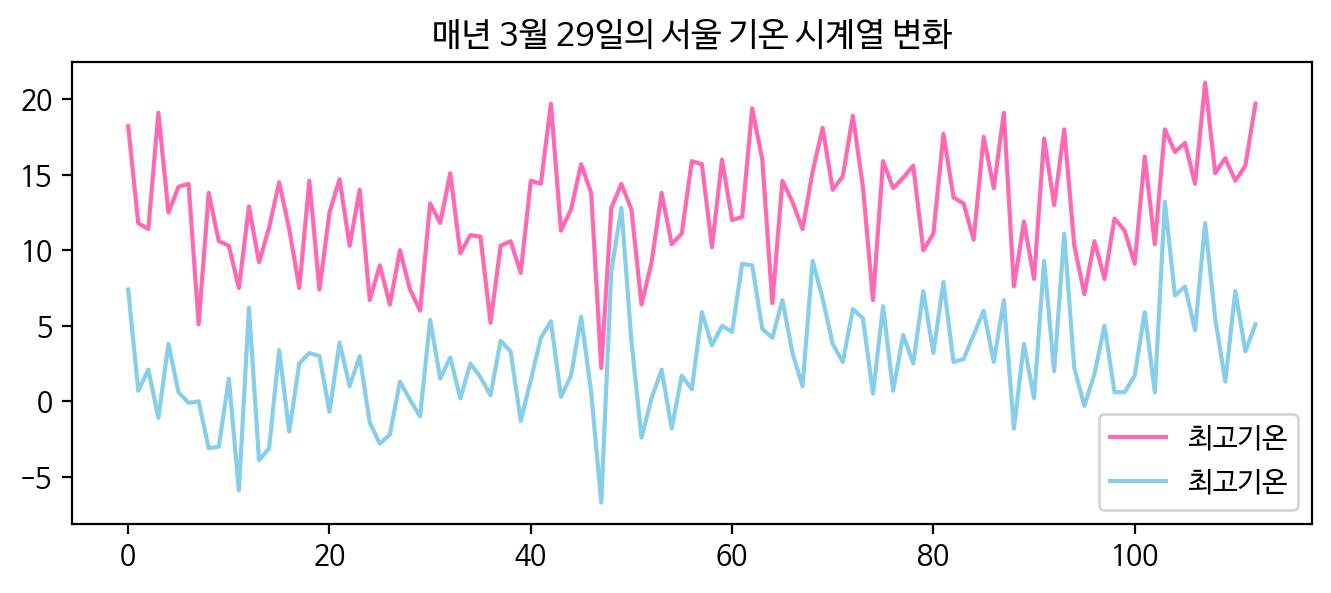

In [59]:
import matplotlib.pyplot as plt
import csv

file = open('/content/temp_seoul.csv', 'r')
data = csv.reader(file, delimiter = ',')

#첫 7줄은 쓸모없음
for i in range(0,7):
    next(data)

#진짜 헤더
header = next(data)
#print(header)

#최고/최저 기온 데이터를 저장할 리스트 생성
high, low = [], []

for row in data:

    #탭만 들어있는 관측치
    if row == ['\t']:
        break

    #만약 결측치라면
    if row[-1] =='':
        row[-1] = -999
    if row[-2] =='':
        row[-2] = 999

    #문자열인 최고/최저기온을 실수로 변환
    row[-1] = float(row[-1])
    row[-2] = float(row[-2])

    #결과 출력
    #print(row)

    #결측치 아닌 경우에 한해서 리스트 안에 추가한다!
    if row[-1] != -999:
        #print(row[0].split('-'))                      #왜 요런게 필요할까?
        if row[0].split('-')[1] == '03' and row[0].split('-')[2] == '29':
            high.append(float(row[-1]))
            low.append(float(row[-2]))

file.close()

plt.figure(figsize = (8, 3), dpi = 200)
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus = False)           #에러메시지에 대응하여 구글링!
plt.plot(high, color = 'hotpink', label = "최고기온")
plt.plot(low, color = 'skyblue', label = "최고기온")
plt.legend()
plt.title('매년 3월 29일의 서울 기온 시계열 변화, 1907-2023')
plt.show()

## 6. 히스토그램

> **히스토그램(histogram)**은 시계열 그래프와는 완전히 다른 목적을 가지고 있다. 특히 자료의 **집계화(aggregation)**가 이루어진다는 점에 주의해야 한다.
<br>
<br>
> 히스토그램을 통해 주어진 관찰값이 얼마나 자주 나타나는지 확인할 수 있다. 이 기법은 데이터 분석에서 굉장히 중요하며, 실무자나 연구자는 거의 매일같이 히스토그램으로 자료를 들여다본다. 구체적인 용례는 <code>help(plt.hist)</code>로 확인하자.

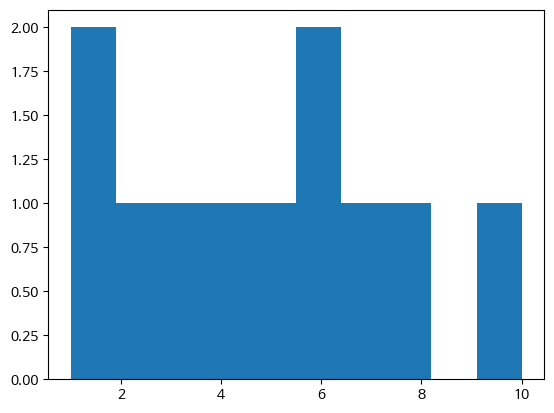

In [60]:
import matplotlib.pyplot as plt

plt.hist([1, 1, 2, 3, 4, 5, 6, 6, 7, 8, 10])
plt.show()

> 통계학을 배우면서 고급 단계에 접어들면 예전에 대충 배웠던 부분(혹은 순수하게 이론적으로만 이해하고 넘어갔던 부분)을 **시뮬레이션(simulation)**으로 재확인하는 과정을 거치게 된다.
<br>
<br>
> 여기서는 간단한 예제로 주사위 던지기의 결과를 테스트해보자. 주사위를 5번 던지면 결과의 **분포(distribution)**는 어떠할까?

[6, 1, 6, 3, 2]


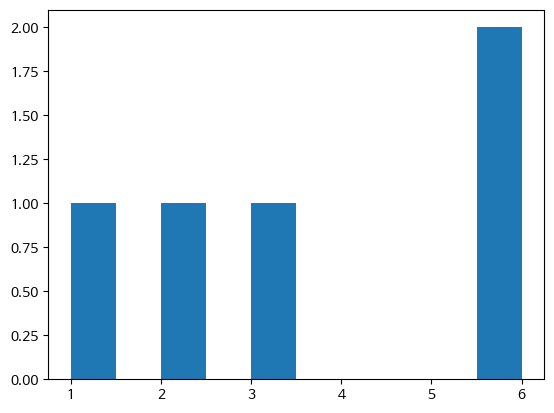

In [66]:
import random

dice = []                   #빈집(placeholder)
for i in range(5):          #5번 던지면?
    value = random.randint(1, 6)
    dice.append(value)

print(dice)
plt.hist(dice)
plt.show()

> 그런데 (5번이 아니라) 50번 던지면 무엇을 알 수 있을까? 주사위의 특정 면이 나올 확률에 관해 당혹스러운 사실이 금방 드러난다.

[3, 6, 6, 3, 5, 2, 1, 4, 4, 2, 6, 3, 3, 4, 5, 3, 1, 5, 1, 6, 4, 3, 3, 4, 5, 1, 1, 1, 1, 2, 4, 4, 4, 4, 2, 4, 6, 1, 5, 4, 1, 2, 3, 5, 1, 5, 1, 5, 5, 1]


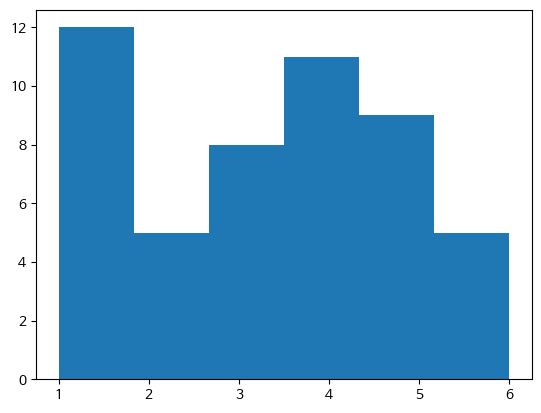

In [69]:
import random
import matplotlib.pyplot as plt

dice = []                   #빈집(placeholder)
for i in range(50):        #50번 던지면?
    value = random.randint(1, 6)
    dice.append(value)

print(dice)
plt.hist(dice, bins = 6)    #왜 bins=6일지 생각해보자
plt.show()

> 아예 10,000번을 던지면 어떨까? 인생을 걸기엔 아깝지만 컴퓨터는 쓱싹이다!
 <br><br>
> (주사위를 한두 번 던졌을 때와는 달리) 여러 번 던지면 각 숫자가 나올 확률은 동등해지리라고 *이성적으로* 예측할 수 있다. 하지만 현실에서는 어떨까? 5회 반복이 아니라 10회, 50회, 100회, 500회, 10000회를 반복해보자. 시뮬레이션은 우리의 이성적 예측과 얼마나 같을까?

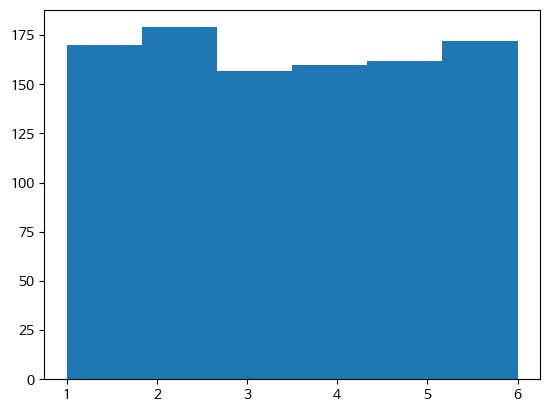

In [67]:
import random
import matplotlib.pyplot as plt

dice = []                   #빈집(placeholder)
for i in range(1000):      #1000번 던지면?
    value = random.randint(1, 6)
    dice.append(value)

#print(dice)
plt.hist(dice, bins = 6)    #왜 bins=6일지 생각해보자
plt.show()

> **연습문제 6**. 서울시의 기온 공공데이터를 사용하여 평균기온의 히스토그램을 그리고자 한다. 먼저 어떤 형태로 그려질지 상상해보고 직접 코드를 작성하여 이를 확인하시오.

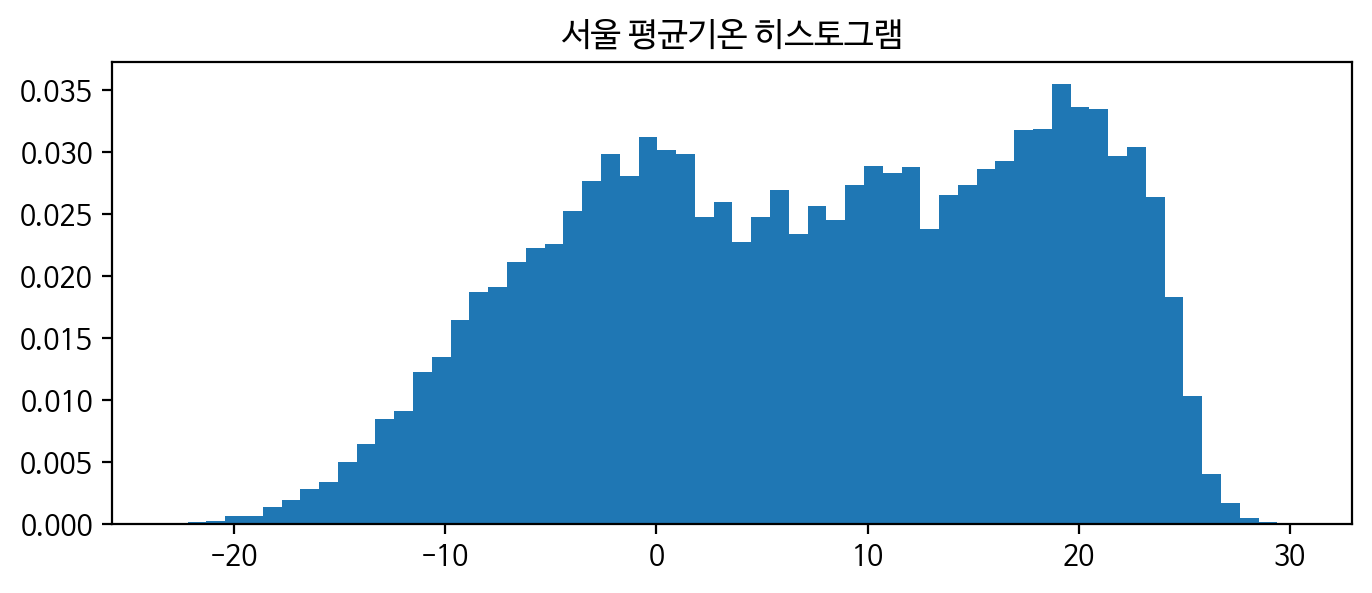

In [83]:
import matplotlib.pyplot as plt
import csv

file = open('/content/temp_seoul.csv', 'r')
data = csv.reader(file, delimiter = ',')

#첫 7줄은 쓸모없음
for i in range(0,7):
    next(data)

#진짜 헤더
header = next(data)
#print(header)

#평균 기온 데이터를 저장할 리스트 생성
avg = []

for row in data:

    #탭만 들어있는 관측치
    if row == ['\t']:
        break

    #만약 결측치라면 -999
    if row[3] =='':
        row[3] = -999

    #문자열인 평균기온을 실수로 변환
    row[3] = float(row[3])

    #결측치가 아닌 값만 리스트 안에 추가한다!
    if row[3] != -999:
        avg.append(float(row[3]))

file.close()

plt.figure(figsize = (8, 3), dpi = 200)
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus = False)           #에러메시지에 대응하여 구글링!
plt.hist(avg, bins=50, density=True)             #이것만 살짝 바뀐다.
plt.title('서울 평균기온 히스토그램, 1907-2023')
plt.show()

## 5. 상자-수염 그림

> **상자-수염 그림(box-whiskers' plot)** 역시 변수의 **기술통계량(descriptive statistics)**을 요약하는데 종종 사용된다(다만 근래 전문가나 연구자들 사이에서는 예전처럼 많이 쓰이진 않는다).
<br><br>
> 상자 가운데 선은 **중앙값(median)**을, 상자의 위아래는 각각 **제1사분위수(1st quartile)**와  **제3사분위수(3rd quartile)**를 나타낸다. 수염의 위아래는 각각 **최대값(maximum)**과 **최소값(minimum)**을 나타낸다. 구체적인 용례는 <code>help(plt.boxplot)</code>로 확인하자.
<br><br>
> 앞서 만들어 본 주사위 던지기 시뮬레이션 결과를 상자-수염 그림으로도 나타내보자.

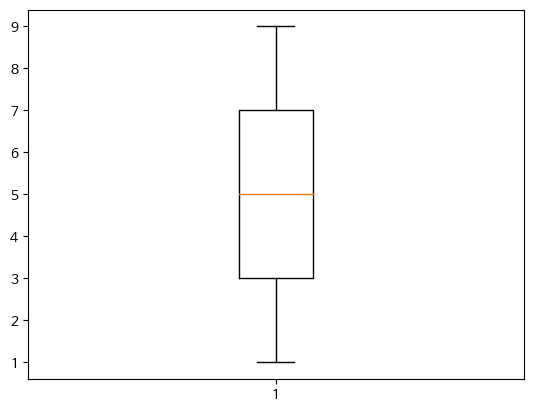

In [92]:
import matplotlib.pyplot as plt

var = [1, 2, 3,     4, 5, 6,     7, 8, 9]

plt.boxplot(var)
plt.show()

> 이번엔 아까 **연습문제 5** 번 문제를 살짝 수정하자. 즉 3월 29일의 역대 최고기온과 최저기온을 히스토그램이 아니라 상자-수염 그림으로 나타내보자!

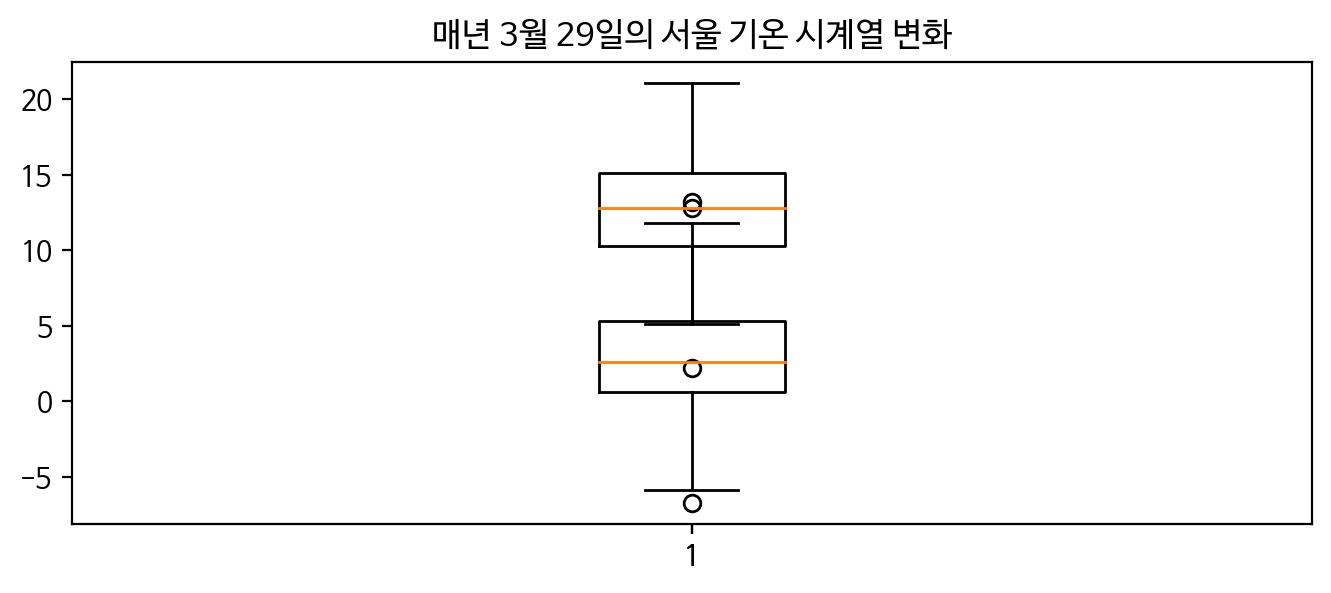

In [84]:
import matplotlib.pyplot as plt
import csv

file = open('/content/temp_seoul.csv', 'r')
data = csv.reader(file, delimiter = ',')

#첫 7줄은 쓸모없음
for i in range(0,7):
    next(data)

#진짜 헤더
header = next(data)
#print(header)

#최고/최저 기온 데이터를 저장할 리스트 생성
high, low = [], []

for row in data:

    #탭만 들어있는 관측치
    if row == ['\t']:
        break

    #만약 결측치라면
    if row[-1] =='':
        row[-1] = -999
    if row[-2] =='':
        row[-2] = 999

    #문자열인 최고/최저기온을 실수로 변환
    row[-1] = float(row[-1])
    row[-2] = float(row[-2])

    #결과 출력
    #print(row)

    #결측치 아닌 경우에 한해서 리스트 안에 추가한다!
    if row[-1] != -999:
        #print(row[0].split('-'))                      #왜 요런게 필요할까?
        if row[0].split('-')[1] == '03' and row[0].split('-')[2] == '29':
            high.append(float(row[-1]))
            low.append(float(row[-2]))

file.close()

plt.figure(figsize = (8, 3), dpi = 200)
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus = False)           #에러메시지에 대응하여 구글링!
#plt.plot(high, color = 'hotpink', label = "최고기온")
#plt.plot(low, color = 'skyblue', label = "최고기온")
plt.boxplot(high)             #이것만 살짝 바뀐다.
plt.boxplot(low)              #이것만 살짝 바뀐다.
#plt.legend()
plt.title('매년 3월 29일의 서울 기온 시계열 변화, 1907-2023')
plt.show()

> 아 좋지 않다! 상자-수염 그림을 위아래로 배치하기보다는 좌우로 배치하기 위해 간단한 트릭을 쓸 수 있다.
<br><br>
> 과거에는 고통스러운 경험을 통해서만 이런 트릭을 *자연스럽게* 알게 되었다. 그보다 최근에는 Stack Overflow에서 물어보거나 구글링하게 되었다. 이제부터는 생성형 AI에 물어보게 될 것이다(직접 물어보자).

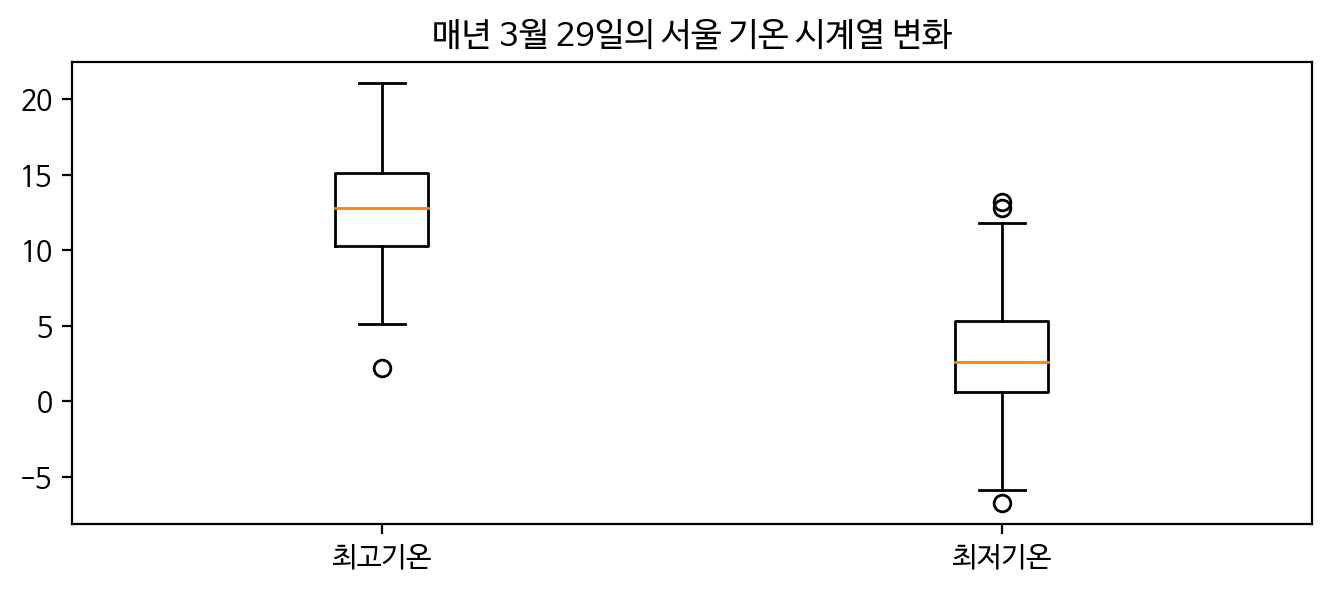

In [74]:
import matplotlib.pyplot as plt
import csv

file = open('/content/temp_seoul.csv', 'r')
data = csv.reader(file, delimiter = ',')

#첫 7줄은 쓸모없음
for i in range(0,7):
    next(data)

#진짜 헤더
header = next(data)
#print(header)

#최고/최저 기온 데이터를 저장할 리스트 생성
high, low = [], []

for row in data:

    #탭만 들어있는 관측치
    if row == ['\t']:
        break

    #만약 결측치라면
    if row[-1] =='':
        row[-1] = -999
    if row[-2] =='':
        row[-2] = 999

    #문자열인 최고/최저기온을 실수로 변환
    row[-1] = float(row[-1])
    row[-2] = float(row[-2])

    #결과 출력
    #print(row)

    #결측치 아닌 경우에 한해서 리스트 안에 추가한다!
    if row[-1] != -999:
        #print(row[0].split('-'))                      #왜 요런게 필요할까?
        if row[0].split('-')[1] == '03' and row[0].split('-')[2] == '29':
            high.append(float(row[-1]))
            low.append(float(row[-2]))

file.close()

plt.figure(figsize = (8, 3), dpi = 200)
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus = False)           #에러메시지에 대응하여 구글링!
#plt.plot(high, color = 'hotpink', label = "최고기온")
#plt.plot(low, color = 'skyblue', label = "최고기온")
#plt.boxplot(high)             #이것만 살짝 바뀐다.
#plt.boxplot(low)              #이것만 살짝 바뀐다.
plt.boxplot([high, low])                       #이런 트릭으로 좌우대조가 된다!
plt.xticks([1, 2], ['최고기온', '최저기온'])
#plt.legend()
plt.title('매년 3월 29일의 서울 기온 시계열 변화, 1907-2023')
plt.show()

> **연습문제 7**. 서울시의 기온 공공데이터를 사용하여 전기간에 걸쳐 *매달* 평균기온 변화의 추이를 나타내는 상자-수염 그림을 그리시오.
<br><br>
> ___
> 힌트: 상자-수염 그림을 시각화할 때, <code>showfliers=False</code> **옵션** 또는 **아규먼트(argument)**를 추가하면 **이상점(outliers)**은 나타내지 않는다.

<Figure size 3000x1500 with 0 Axes>

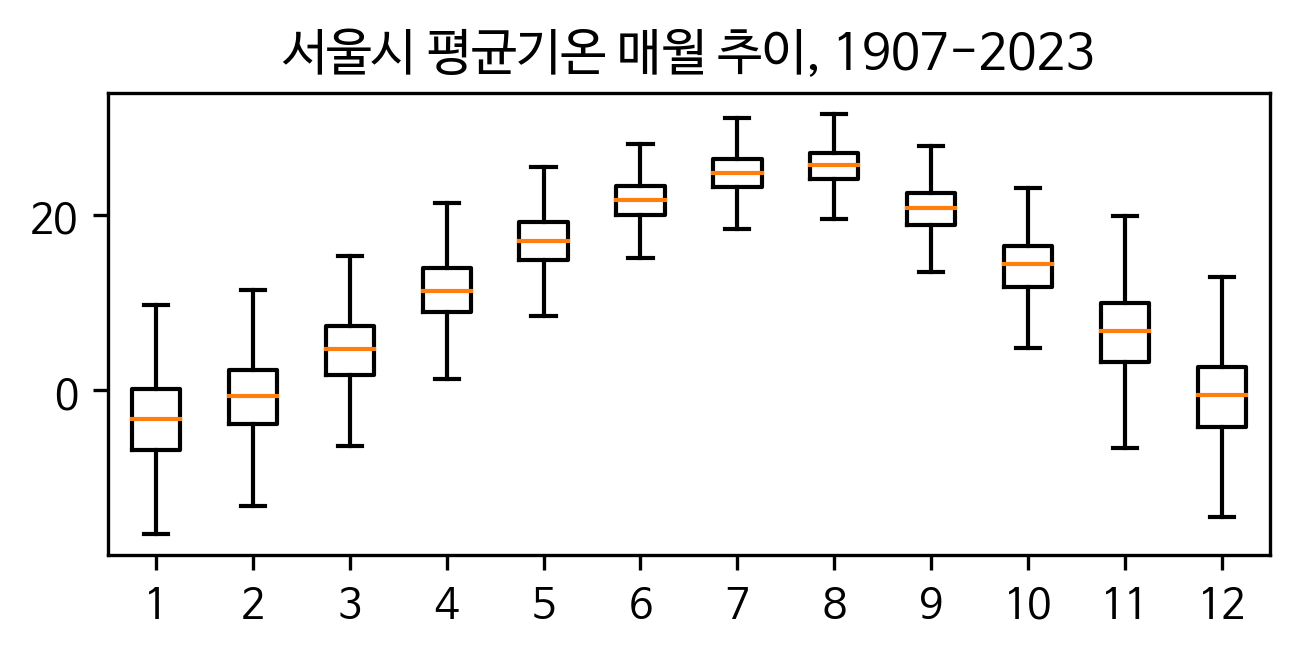

In [86]:
import matplotlib.pyplot as plt
import csv

file = open('/content/temp_seoul.csv', 'r')
data = csv.reader(file, delimiter = ',')

#첫 7줄은 쓸모없울
for i in range(0,7):
    next(data)

#진짜 헤더
header = next(data)
#print(header)

#빈집 안의 12개 빈집들(1월부터 12월까지!)
months = [[], [], [], [], [], [], [], [], [], [], [], []]

#은근슬쩍 여기에!
plt.figure(figsize=(10,5), dpi=300)

for row in data:

    #탭만 들어있는 관측치
    if row == ['\t']:
        break

    #만약 결측치라면 -999를 넣을 것!
    if row[2] =='':
        row[2] = -999

    #문자열인 최고/최저기온을 실수로 변환
    row[2] = float(row[2])

    #결과 출력
    #print(row)

    #이렇게 결측치 아닌 경우에 한해서 리스트 안에 추가한다!
    if row[2] != -999:
        month = int(row[0].split('-')[1]) - 1        #리스트의 인덱스
        temp = float(row[2])                         #집어넣을 평균기온
        months[month].append(temp)                   #리스트 어디에 집어넣는지 꼼꼼히 볼 것!

file.close()

plt.figure(figsize = (5, 2), dpi = 300)         #figure size는 5x2 그리고 dots per inch는 300
plt.rc('font', family='NanumBarunGothic')
plt.title('서울시 평균기온 매월 추이, 1907-2023')
plt.boxplot(months, showfliers=False)           #이상점(outliers)을 표시하지 않음
plt.show()